In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ICNN

In [3]:
path = '/Users/jonasflor/Desktop/gitrepos/gastrulation_atlas/scvi/reference_query/divergence_results'

data = []
for c in ['1M', '500k', '100k', '10k']:
    for g in ['2k_genes', '10k_genes', 'all_genes']:
        for a in ['unintegrated', 'integrated']:
            for t in ['85', '12', 'cond']:
                try:
                    tmp = pd.read_csv(f'divergence_{c}_{g}_{a}_{t}.csv')
                    tmp['type'] = a
                    if t=='cond':
                        tmp['ot'] = t
                        tmp.iat[1, 3]='12.0, 18.5'
                    else:
                        tmp['ot'] ='sep'
                    data.append(tmp)
                except FileNotFoundError:
                    pass
                    
data = pd.concat(data)
data

,Unnamed: 0,n_obs,n_genes,time,divergence,divergence_ref,type,ot
0,0,1M,2k_genes,"8.5, 12.0",1.627819e+04,4.274621e+05,unintegrated,sep
0,0,1M,2k_genes,"12.0, 18.5",3.130933e+04,1.962755e+04,unintegrated,sep
0,0,1M,2k_genes,"8.5, 12.0",8.080238e-05,4.274621e+05,unintegrated,cond
1,1,1M,2k_genes,"12.0, 18.5",3.701396e+04,1.962755e+04,unintegrated,cond
0,0,1M,2k_genes,"8.5, 12.0",2.510255e+14,1.377535e-13,integrated,sep
...,...,...,...,...,...,...,...,...
1,1,10k,all_genes,"12.0, 18.5",3.449698e+04,2.441429e+04,unintegrated,cond
0,0,10k,all_genes,"8.5, 12.0",5.838061e-01,3.929860e+17,integrated,sep
0,0,10k,all_genes,"12.0, 18.5",2.517542e+18,6.474411e-08,integrated,sep
0,0,10k,all_genes,"8.5, 12.0",4.719477e-07,1.421086e-14,integrated,cond


In [4]:
data['n_obs_type_ot'] = data['n_obs'] + '/' + data['type'] + '/' + data['ot']
data['model'] = data['n_obs'] + '/' + data['n_genes']
data['div_quotient'] = data['divergence']/data['divergence_ref']
data

,Unnamed: 0,n_obs,n_genes,time,divergence,divergence_ref,type,ot,n_obs_type_ot,model,div_quotient
0,0,1M,2k_genes,"8.5, 12.0",1.627819e+04,4.274621e+05,unintegrated,sep,1M/unintegrated/sep,1M/2k_genes,3.808100e-02
0,0,1M,2k_genes,"12.0, 18.5",3.130933e+04,1.962755e+04,unintegrated,sep,1M/unintegrated/sep,1M/2k_genes,1.595172e+00
0,0,1M,2k_genes,"8.5, 12.0",8.080238e-05,4.274621e+05,unintegrated,cond,1M/unintegrated/cond,1M/2k_genes,1.890282e-10
1,1,1M,2k_genes,"12.0, 18.5",3.701396e+04,1.962755e+04,unintegrated,cond,1M/unintegrated/cond,1M/2k_genes,1.885816e+00
0,0,1M,2k_genes,"8.5, 12.0",2.510255e+14,1.377535e-13,integrated,sep,1M/integrated/sep,1M/2k_genes,1.822280e+27
...,...,...,...,...,...,...,...,...,...,...,...
1,1,10k,all_genes,"12.0, 18.5",3.449698e+04,2.441429e+04,unintegrated,cond,10k/unintegrated/cond,10k/all_genes,1.412983e+00
0,0,10k,all_genes,"8.5, 12.0",5.838061e-01,3.929860e+17,integrated,sep,10k/integrated/sep,10k/all_genes,1.485564e-18
0,0,10k,all_genes,"12.0, 18.5",2.517542e+18,6.474411e-08,integrated,sep,10k/integrated/sep,10k/all_genes,3.888450e+25
0,0,10k,all_genes,"8.5, 12.0",4.719477e-07,1.421086e-14,integrated,cond,10k/integrated/cond,10k/all_genes,3.321037e+07


In [5]:
data_2k = data[data['n_genes']=='2k_genes']
data_10k = data[data['n_genes']=='10k_genes']
data_all = data[data['n_genes']=='all_genes']

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

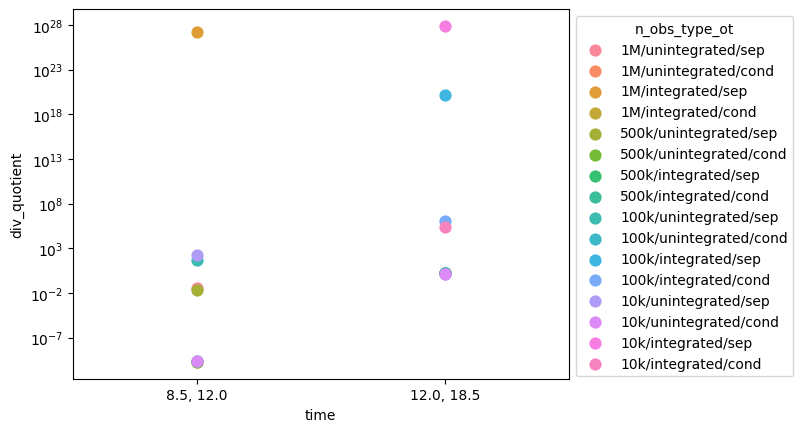

In [6]:
fig = sns.pointplot(data_2k, x='time', y='div_quotient', hue='n_obs_type_ot', linestyles='none')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.yscale('log')

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

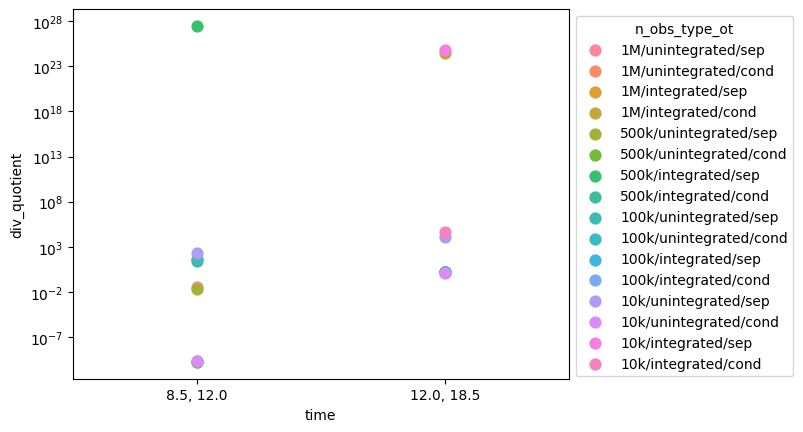

In [7]:
fig = sns.pointplot(data_10k, x='time', y='div_quotient', hue='n_obs_type_ot', linestyles='none')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.yscale('log')

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

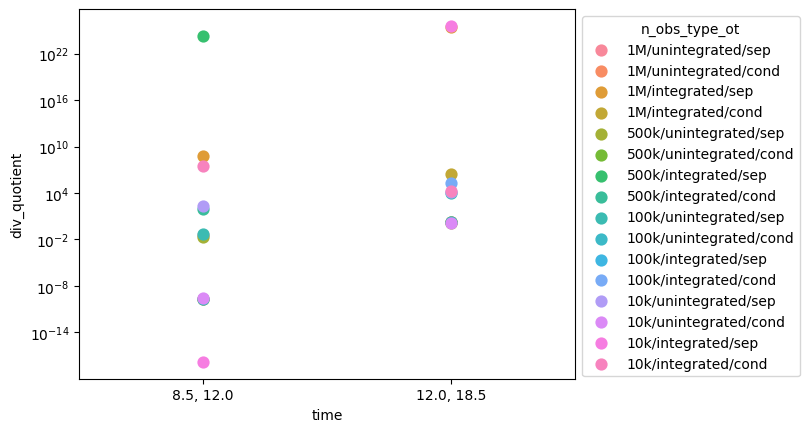

In [8]:
fig = sns.pointplot(data_all, x='time', y='div_quotient', hue='n_obs_type_ot', linestyles='none')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.yscale('log')

In [15]:
data_all[abs(data_all['div_quotient'])<1]

,Unnamed: 0,n_obs,n_genes,time,divergence,divergence_ref,type,ot,n_obs_type_ot,model,div_quotient
0,0,1M,all_genes,"8.5, 12.0",1.627819e+04,4.274621e+05,unintegrated,sep,1M/unintegrated/sep,1M/all_genes,3.808100e-02
0,0,1M,all_genes,"8.5, 12.0",8.161947e-05,4.274471e+05,unintegrated,cond,1M/unintegrated/cond,1M/all_genes,1.909463e-10
0,0,500k,all_genes,"8.5, 12.0",9.385814e+03,4.374852e+05,unintegrated,sep,500k/unintegrated/sep,500k/all_genes,2.145401e-02
0,0,500k,all_genes,"8.5, 12.0",8.144402e-05,4.374852e+05,unintegrated,cond,500k/unintegrated/cond,500k/all_genes,1.861640e-10
1,1,500k,all_genes,"12.0, 18.5",1.106736e-03,-2.604273e+07,integrated,cond,500k/integrated/cond,500k/all_genes,-4.249694e-11
0,0,100k,all_genes,"8.5, 12.0",1.835624e+04,3.831184e+05,unintegrated,sep,100k/unintegrated/sep,100k/all_genes,4.791271e-02
0,0,100k,all_genes,"8.5, 12.0",8.484584e-05,3.831253e+05,unintegrated,cond,100k/unintegrated/cond,100k/all_genes,2.214572e-10
0,0,100k,all_genes,"8.5, 12.0",1.035049e+21,-inf,integrated,sep,100k/integrated/sep,100k/all_genes,-0.000000e+00
0,0,100k,all_genes,"12.0, 18.5",1.485246e+11,-inf,integrated,sep,100k/integrated/sep,100k/all_genes,-0.000000e+00
0,0,10k,all_genes,"8.5, 12.0",6.920072e-05,2.597929e+05,unintegrated,cond,10k/unintegrated/cond,10k/all_genes,2.663687e-10


In [14]:
data_10k[abs(data_10k['div_quotient'])<1]

,Unnamed: 0,n_obs,n_genes,time,divergence,divergence_ref,type,ot,n_obs_type_ot,model,div_quotient
0,0,1M,10k_genes,"8.5, 12.0",16278.186000,427462.12,unintegrated,sep,1M/unintegrated/sep,1M/10k_genes,3.808100e-02
0,0,1M,10k_genes,"8.5, 12.0",0.000082,427447.12,unintegrated,cond,1M/unintegrated/cond,1M/10k_genes,1.909463e-10
0,0,500k,10k_genes,"8.5, 12.0",9385.814000,437485.22,unintegrated,sep,500k/unintegrated/sep,500k/10k_genes,2.145401e-02
0,0,500k,10k_genes,"8.5, 12.0",0.000081,437485.22,unintegrated,cond,500k/unintegrated/cond,500k/10k_genes,1.861640e-10
0,0,100k,10k_genes,"8.5, 12.0",0.000086,383118.20,unintegrated,cond,100k/unintegrated/cond,100k/10k_genes,2.251695e-10
0,0,10k,10k_genes,"8.5, 12.0",0.000067,259796.56,unintegrated,cond,10k/unintegrated/cond,10k/10k_genes,2.583177e-10


In [13]:
data_2k[abs(data_2k['div_quotient'])<1]

,Unnamed: 0,n_obs,n_genes,time,divergence,divergence_ref,type,ot,n_obs_type_ot,model,div_quotient
0,0,1M,2k_genes,"8.5, 12.0",1.627819e+04,4.274621e+05,unintegrated,sep,1M/unintegrated/sep,1M/2k_genes,3.808100e-02
0,0,1M,2k_genes,"8.5, 12.0",8.080238e-05,4.274621e+05,unintegrated,cond,1M/unintegrated/cond,1M/2k_genes,1.890282e-10
0,0,500k,2k_genes,"8.5, 12.0",8.722446e+03,4.374917e+05,unintegrated,sep,500k/unintegrated/sep,500k/2k_genes,1.993740e-02
0,0,500k,2k_genes,"8.5, 12.0",8.144402e-05,4.374852e+05,unintegrated,cond,500k/unintegrated/cond,500k/2k_genes,1.861640e-10
0,0,500k,2k_genes,"12.0, 18.5",8.200046e+14,-6.594183e+15,integrated,sep,500k/integrated/sep,500k/2k_genes,-1.243527e-01
1,1,500k,2k_genes,"12.0, 18.5",1.247201e-03,-6.594183e+15,integrated,cond,500k/integrated/cond,500k/2k_genes,-1.891366e-19
0,0,100k,2k_genes,"8.5, 12.0",8.626653e-05,3.831182e+05,unintegrated,cond,100k/unintegrated/cond,100k/2k_genes,2.251695e-10
0,0,100k,2k_genes,"8.5, 12.0",1.643752e+19,inf,integrated,sep,100k/integrated/sep,100k/2k_genes,0.000000e+00
0,0,100k,2k_genes,"8.5, 12.0",1.605949e-07,inf,integrated,cond,100k/integrated/cond,100k/2k_genes,0.000000e+00
0,0,10k,2k_genes,"8.5, 12.0",6.711006e-05,2.597966e+05,unintegrated,cond,10k/unintegrated/cond,10k/2k_genes,2.583177e-10


# OTFM

In [9]:
path = '/Users/jonasflor/Desktop/gitrepos/gastrulation_atlas/scvi/reference_query/divergence_results/flow/'

data = []
for c in ['1M', '500k', '100k', '10k']:
    for g in ['2k_genes', '10k_genes', 'all_genes']:
        for a in ['integrated', 'unintegrated']:
            for t in ['0900', '1025']:
                try:
                    tmp = pd.read_csv(f'{path}divergence_{c}_{g}_{a}_{t}.csv')
                    tmp['type'] = a
                    data.append(tmp)
                except FileNotFoundError:
                    pass
                    
data = pd.concat(data)
data['div_quotient'] = data['divergence']/data['divergence_ref']
data['n_obs_type'] = data['n_obs'] + '/' + data['type']
data

,Unnamed: 0,n_obs,n_genes,time,divergence,divergence_ref,type,div_quotient,n_obs_type
0,0,1M,2k_genes,"09.00, 13.50",-1.489920e-05,NaN,integrated,NaN,1M/integrated
0,0,1M,2k_genes,"10.25, 10.50",3.879713e-08,-1.426354e-05,integrated,-2.720021e-03,1M/integrated
0,0,1M,2k_genes,"09.00, 13.50",3.811382e+03,7.767830e+03,unintegrated,4.906624e-01,1M/unintegrated
0,0,1M,2k_genes,"10.25, 10.50",7.893220e+02,1.759328e+03,unintegrated,4.486497e-01,1M/unintegrated
0,0,1M,10k_genes,"09.00, 13.50",2.448903e-01,NaN,integrated,NaN,1M/integrated
0,0,1M,10k_genes,"10.25, 10.50",1.146461e-01,NaN,integrated,NaN,1M/integrated
0,0,1M,10k_genes,"09.00, 13.50",3.788876e+03,7.767819e+03,unintegrated,4.877657e-01,1M/unintegrated
0,0,1M,10k_genes,"10.25, 10.50",8.343838e+02,1.745494e+03,unintegrated,4.780216e-01,1M/unintegrated
0,0,1M,all_genes,"09.00, 13.50",4.486578e-08,NaN,integrated,NaN,1M/integrated
0,0,1M,all_genes,"10.25, 10.50",4.548243e-08,-inf,integrated,-0.000000e+00,1M/integrated


In [10]:
data_2k = data[data['n_genes']=='2k_genes']
data_10k = data[data['n_genes']=='10k_genes']
data_all = data[data['n_genes']=='all_genes']

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

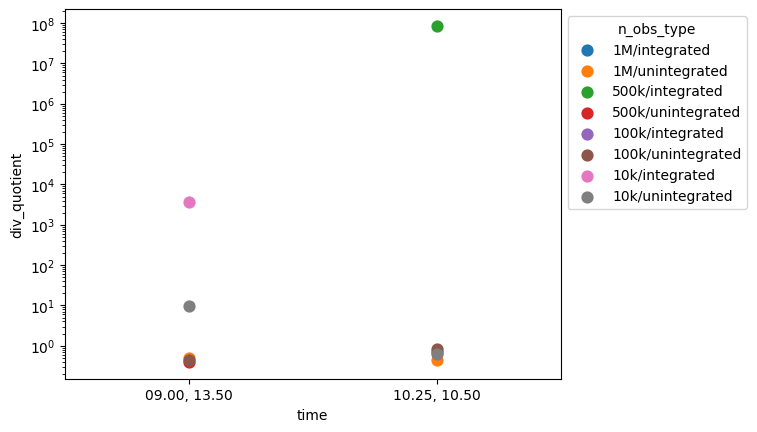

In [12]:
fig = sns.pointplot(data_2k, x='time', y='div_quotient', hue='n_obs_type', linestyles='none')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.yscale('log')

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

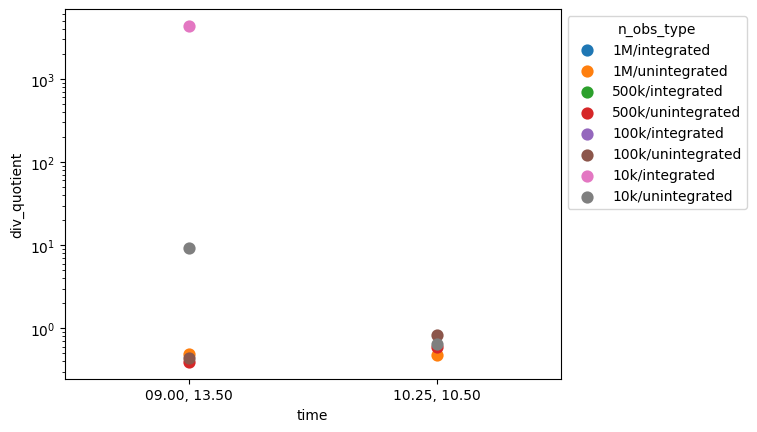

In [14]:
fig = sns.pointplot(data_10k, x='time', y='div_quotient', hue='n_obs_type', linestyles='none')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.yscale('log')

/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonasflor/mambaforge/envs/scvi_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

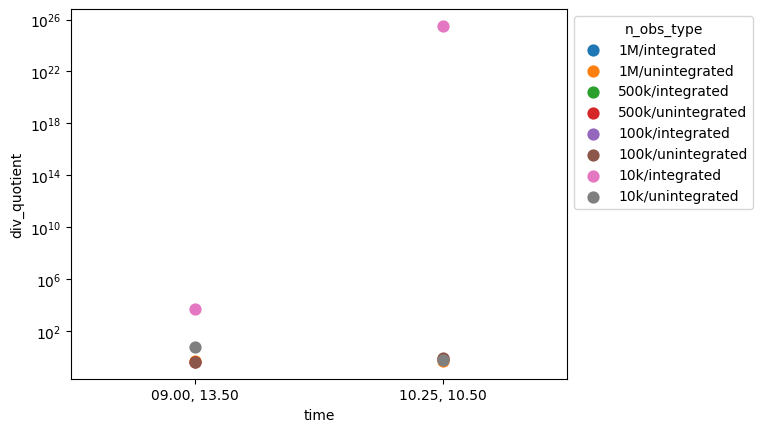

In [15]:
fig = sns.pointplot(data_all, x='time', y='div_quotient', hue='n_obs_type', linestyles='none')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.yscale('log')

In [16]:
data_all[abs(data_all['div_quotient'])<1]

,Unnamed: 0,n_obs,n_genes,time,divergence,divergence_ref,type,div_quotient,n_obs_type
0,0,1M,all_genes,"10.25, 10.50",4.548243e-08,-inf,integrated,-0.000000,1M/integrated
0,0,1M,all_genes,"09.00, 13.50",3.585956e+03,7767.8193,unintegrated,0.461643,1M/unintegrated
0,0,1M,all_genes,"10.25, 10.50",8.674868e+02,1745.4560,unintegrated,0.496997,1M/unintegrated
0,0,500k,all_genes,"10.25, 10.50",2.999218e+02,inf,integrated,0.000000,500k/integrated
0,0,500k,all_genes,"09.00, 13.50",3.232666e+03,8080.3340,unintegrated,0.400066,500k/unintegrated
0,0,500k,all_genes,"10.25, 10.50",1.418009e+03,2008.9482,unintegrated,0.705847,500k/unintegrated
0,0,100k,all_genes,"09.00, 13.50",3.592272e+03,8474.7560,unintegrated,0.423879,100k/unintegrated
0,0,100k,all_genes,"10.25, 10.50",1.817087e+03,2130.3594,unintegrated,0.852949,100k/unintegrated
0,0,10k,all_genes,"10.25, 10.50",2.575562e+03,4211.5747,unintegrated,0.611544,10k/unintegrated


In [17]:
data_10k[abs(data_10k['div_quotient'])<1]

,Unnamed: 0,n_obs,n_genes,time,divergence,divergence_ref,type,div_quotient,n_obs_type
0,0,1M,10k_genes,"09.00, 13.50",3.788876e+03,7767.8193,unintegrated,0.487766,1M/unintegrated
0,0,1M,10k_genes,"10.25, 10.50",8.343838e+02,1745.4941,unintegrated,0.478022,1M/unintegrated
0,0,500k,10k_genes,"09.00, 13.50",3.188565e+03,8080.3340,unintegrated,0.394608,500k/unintegrated
0,0,500k,10k_genes,"10.25, 10.50",1.194156e+03,2008.9580,unintegrated,0.594416,500k/unintegrated
0,0,100k,10k_genes,"10.25, 10.50",6.348370e-08,inf,integrated,0.000000,100k/integrated
0,0,100k,10k_genes,"09.00, 13.50",3.746052e+03,8474.8630,unintegrated,0.442019,100k/unintegrated
0,0,100k,10k_genes,"10.25, 10.50",1.780512e+03,2130.5137,unintegrated,0.835720,100k/unintegrated
0,0,10k,10k_genes,"10.25, 10.50",2.751312e+03,4211.5747,unintegrated,0.653274,10k/unintegrated


In [18]:
data_2k[abs(data_2k['div_quotient'])<1]

,Unnamed: 0,n_obs,n_genes,time,divergence,divergence_ref,type,div_quotient,n_obs_type
0,0,1M,2k_genes,"10.25, 10.50",3.879713e-08,-0.000014,integrated,-0.002720,1M/integrated
0,0,1M,2k_genes,"09.00, 13.50",3.811382e+03,7767.830000,unintegrated,0.490662,1M/unintegrated
0,0,1M,2k_genes,"10.25, 10.50",7.893220e+02,1759.327900,unintegrated,0.448650,1M/unintegrated
0,0,500k,2k_genes,"09.00, 13.50",3.210078e+03,8080.334000,unintegrated,0.397270,500k/unintegrated
0,0,500k,2k_genes,"10.25, 10.50",1.370328e+03,2010.726100,unintegrated,0.681509,500k/unintegrated
0,0,100k,2k_genes,"09.00, 13.50",3.826436e+03,8474.756000,unintegrated,0.451510,100k/unintegrated
0,0,100k,2k_genes,"10.25, 10.50",1.729448e+03,2130.513700,unintegrated,0.811752,100k/unintegrated
0,0,10k,2k_genes,"10.25, 10.50",2.575562e+03,4211.574700,unintegrated,0.611544,10k/unintegrated
